In [29]:
# Before ANY submission to GitHub, set this to True so that we can verify this notebook without retraining all the deep learning models.
# All models will be loaded from file instead.
stop_training = True

In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install openml --quiet
  !pip install dill --quiet

In [3]:
# Uncomment the following line to run in Google Colab
# This will link the notebook to your Google drive to store your models and cache the dataset.
# It will probably ask you to click on a link to get a verification code.

#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [4]:
# Uncomment the following to check whether you have access to a GPU in Google Colab
# See further instructions below.

#import tensorflow as tf
#tf.config.experimental.list_physical_devices('GPU') 

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import openml
import os

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(tensorflow_version) < version.parse("2.7.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.7 or later (e.g. 2.12)".format(tensorflow_version))
else:
    print("Looks good. You may continue :)")

Looks good. You may continue :)


# Assignment 3

In [7]:
# Fill in your names using the format below
your_name = "Rangaraj, Pavan Aakash"

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch, that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers. 

Especially, you'll need to reimplement `run_evaluation`, making sure that your models are stored and reloaded if they exist. It must also report the validation score correctly. If `stop_training = True` no models should be trained when running the notebook (only loaded from file). To store models, use the .pt or .pth extension.

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed up training a lot. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 4th cell on the top of this notebook to check that the GPU is found.

Note that the free version of Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine. Take this into account in your planning, so that you don't do all your training at the last moment and are locked out right before the deadline.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you. Be sure to upload all .h5 and .p files, as well as any .json files created (these are created only for large models).

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
  * The 2nd cell (above) does this programmatically for you
* Fill in the path to your assignment folder below
  * It's likely `base_dir = '/content/drive/My Drive/assignment-3-name'`
  * 'name' will likely be your github handle

In [8]:
# Define where the models should be stored
base_dir = 'models/'

### Verification and submission

If you use Colab, there are a few things to consider before submission:
* You need to download the notebook and all the models from your Google Drive to a local folder. Models should be stored in the main directory, next to your notebook.
* To run the notebook locally, make sure that you have set `stop_training = True` in the first cell to avoid retraining all models. Also comment out any Colab-specific code in the cells above.
* Set `base_dir` back to your local directory where the files are, likely `base_dir = './'`
* Again, don't wait until the last moment to submit.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are. We provide code below that stores the model efficiently. Smaller models are simply stored entirely to disk as one h5 file. For larger models, we will only store the weights (h5 file) and structure (json file), and ignore the state of the optimizer. In any case, the weights alone should not take more than 100MB of storage. Take this into account especially for loading pre-trained models in the last question. Bigger pre-trained models are not always better - in fact they will easily overfit. Make sure that your model weights take less than 100MB of storage.
* When questions ask you to provide an explanation, it should be less than 600 characters long, or as long as specified. Make sure that you don't violate this constraint.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters", yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your models perform. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance, with the top grade awarded to the best model in class. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to check that all the results are included.
* The dataset we will use is quite large and can take a while to download and cache for the first time. Once cached, it should load fast. Even if you use Colab, at least run the notebook once locally when you start doing the assignment (i.e., now). That way the dataset will be cached so that you can do the verification faster.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model. Don't say 'I tried every possible option and this is the best I found', but rather 'I tried X because I think that Y' and then interpret the results and what you learned from them'.
* **Be original. We will check for plagiarism between student submissions.**

### Data

The [Plankton dataset](https://meta-album.github.io/datasets/PLK.html) is created by researchers at the Woods Hole Oceanographic Institution ([WHOI](https://www.whoi.edu)). Each image in the dataset contains one or more plankton. The images are captured in a controlled environment and have different orientations based on the flow of the fluid in which the images are captured and the size and shape of the planktons. The preprocessed plankton dataset is prepared from the original WHOI Plankton dataset. The preprocessing of the images is done by creating a background squared image by either duplicating the top and bottom-most 3 rows or the left and right most 3 columns based on the orientation of the original image to match the width or height of the image respectively. A Gaussian kernel of size 29x29 is applied to the background image to blur the image. Finally, the original plankton image is pasted on the background image at the center of the image. The squared background image with the original plankton image on top of it as one image is then resized to 128x128 pixels with anti-aliasing.

Check here to view example images for each category: https://whoigit.github.io/whoi-plankton

[OpenML](https://www.openml.org/) has 3 versions of the Plankton dataset: [Micro](https://www.openml.org/search?type=data&sort=runs&id=44238&status=active), [Mini](https://www.openml.org/search?type=data&status=active&id=45104&sort=runs) and [Extended](https://www.openml.org/search?type=data&sort=runs&id=44317&status=active). For this assigment, we will be using the Plankton Mini version which contains 3440 examples with 86 classes (the OpenML dataset ID is 45104).


In [9]:
# Download the dataset. You can ignore the warning.
d = openml.datasets.get_dataset(45104, download_all_files=True)
df, *_ = d.get_data()

# Defines where the raw image files are stored
# OpenML caches them by default, so we can point there
data_dir = os.path.join(openml.config.cache_directory, "org/openml/www/datasets/45104/PLK_Mini/images/")

d:\DSAI-22-24\TUe-Year1\Q3\MLE\assignment-3-PhobosX15\.conda\lib\site-packages\openml\datasets\functions.py:404: UserWarning: ``download_all_files`` is experimental and is likely to break with new releases.
  warnings.warn(


In [10]:
# Create a validation split. 
# The labels are in the dataframe itself.

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df['encoded_labels'] = preprocessing.LabelEncoder().fit(df['CATEGORY']).transform(df['CATEGORY'])
df['encoded_labels'] = df['encoded_labels'].astype("str")

df_train, df_valid = train_test_split(df, stratify = df['encoded_labels'], test_size = 0.1)

Note that this dataframe contains only pointers to the image files (FILE_NAME), and meta-data such as the class (CATEGORY).

In [11]:
df_train.head()

FILE_NAME                 CATEGORY   
1949  IFCB5_2013_198_200218_01095.png                  pennate  \
2090  IFCB1_2008_001_000039_00311.png  Parvicorbicula_socialis   
1627  IFCB5_2013_213_164947_03572.png              Skeletonema   
799   IFCB5_2012_046_185848_00293.png          Pseudonitzschia   
201   IFCB1_2006_361_000315_01634.png    G_delicatula_detritus   

      SUPER_CATEGORY encoded_labels  
1949             NaN             82  
2090             NaN             47  
1627             NaN             57  
799              NaN             54  
201              NaN             28

### Data generator
Image datasets such as these are large. For efficiency reasons, we won't preprocess all images beforehand. We'll use a data generator that fetches batches of images and then converts them on the fly.

Note that we build two generators: one for training data and one for validation data. They will each return batches of 128x128 pixel images and their corresponding labels. The pixel values are integers between 0 and 256.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
train_generator = datagen_train.flow_from_dataframe(dataframe=df_train, 
                                            directory=data_dir,
                                            x_col="FILE_NAME", y_col="encoded_labels",
                                            class_mode="categorical",
                                            target_size=(128,128),
                                            batch_size=40,
                                            augment=True)

datagen_valid = ImageDataGenerator()
valid_generator = datagen_valid.flow_from_dataframe(dataframe=df_valid, 
                                            directory=data_dir,
                                            x_col="FILE_NAME", y_col="encoded_labels",
                                            class_mode="categorical",
                                            target_size=(128,128),
                                            batch_size=40)

Found 3096 validated image filenames belonging to 86 classes.
Found 344 validated image filenames belonging to 86 classes.


### Peek at the data
It's always good to take a close look at the images and see what propertis they have that we need to take into account when designing a neural net. Note that while the images look like grayscale, they are actually RGB images.

In [13]:
def plot_images(X, y, title = None):
    fig, axes = plt.subplots(1, len(X),  figsize=(15,45), layout='constrained')
    if title:
      plt.title(title)
    for n in range(len(X)):
      axes[n].imshow(X[n],cmap='gray')
      axes[n].set_xlabel(y[n], fontsize = 7)
      axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show()

In [14]:
import cv2
df_train_rsub = df_train.sample(10, random_state = 0)
X_rand_train = [cv2.imread(os.path.join(data_dir, filename)) for filename in df_train_rsub['FILE_NAME'].to_numpy()]
y_rand_train = df_train_rsub['CATEGORY'].to_numpy()

df_valid_rsub = df_valid.sample(10, random_state = 0)
X_rand_valid = [cv2.imread(os.path.join(data_dir, filename)) for filename in df_valid_rsub['FILE_NAME'].to_numpy()]
y_rand_valid = df_valid_rsub['CATEGORY'].to_numpy()

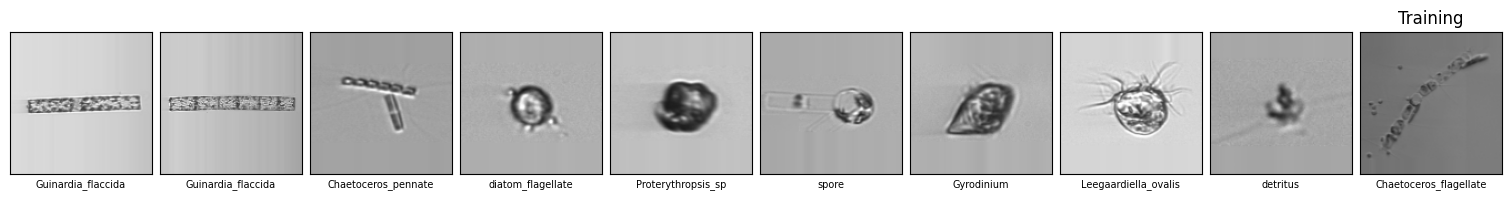

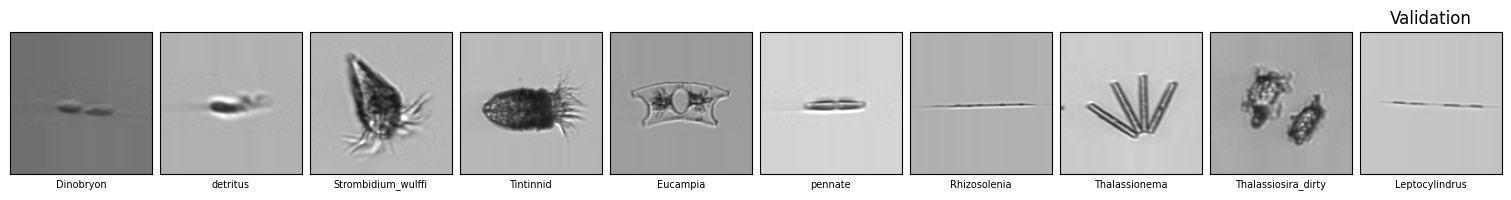

In [15]:
plot_images(X_rand_train, y_rand_train, title = "Training")
plot_images(X_rand_valid, y_rand_valid, title = "Validation")

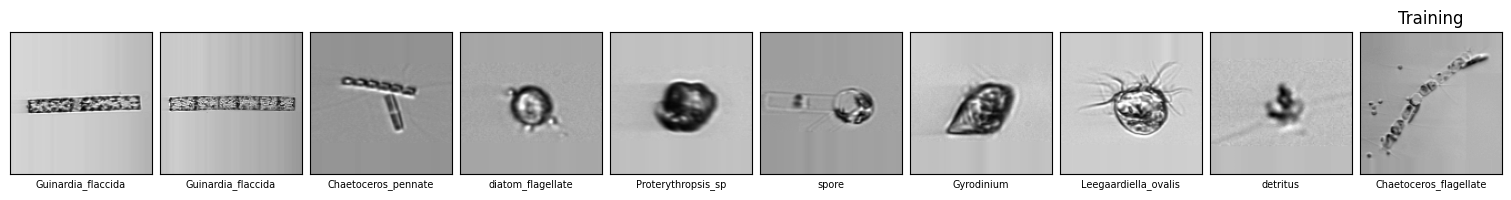

In [16]:
#convert X_rand_train to grayscale
X_rand_train_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_rand_train]
plot_images(X_rand_train_gray, y_rand_train, title = "Training")

In [17]:
#sample 10 images from datagen_train
X_rand_train_aug = []
y_rand_train_aug = []
for i in range(10):
    X_rand_train_aug.append(train_generator.next()[0][0])
    y_rand_train_aug.append(train_generator.next()[1][0])
    

In [18]:
# Helper variables to make your code cleaner.
IMG_SIZE = 128
NUM_CLASSES = 86

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [19]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
import tensorflow as tf
tf.config.run_functions_eagerly(True)
page.page = print

# Helper function for user feedback
def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# Helper function to format answers
def print_answer(ans):
    output = ""
    for line in ans.splitlines()[0:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
    

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        # if a json description is available, load config and then weights
        if os.path.isfile(os.path.join(base_dir, name+'.json')):
            json_file = open(os.path.join(base_dir, name+'.json'), 'r')
            loaded_model_json = json_file.read()
            json_file.close()
            model = model_from_json(loaded_model_json)
            model.load_weights(os.path.join(base_dir, name+extension))
        # else just load the entire model from hdf5 file
        else:
            model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed.
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    path = os.path.join(base_dir, name+extension)
    model.save(path)
    size = os.path.getsize(path)
    # If model > 100MB, store the weights and architecture only.
    if size > 100*1024*1024:
        print("Model larger than 100MB, storing weights only.")
        model.save_weights(path)
        model_json = model.to_json()
        with open(os.path.join(base_dir, name+".json"), "w") as json_file:
            json_file.write(model_json)

# Evaluation harness
def run_evaluation(name, model_builder, base_dir, train=True, data=None,
                   train_generator=None, valid_generator=None, epochs=3, batch_size=32, 
                   steps_per_epoch=60, validation_steps=30,
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data is given as a generator or not. Set batch size to None when using a generator.
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with. Set batch size to None when using a generator.
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    print_model -- whether or not to print the model
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              patience=5,
                                              restore_best_weights=True,
                                              )
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}

    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if train_generator:
            history = model.fit(train_generator, steps_per_epoch=steps_per_epoch,  
                                validation_data = valid_generator, validation_steps = validation_steps,
                                batch_size=batch_size, epochs=epochs, verbose=1,
                                callbacks=[callback],
                                )
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val),
                              callbacks=[callback]
                              )
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(base_dir,name+'.png'))

#### Toy example
See how the models are stored locally and how the evaluation is done. Also note how the run_evaluation function is called. Please remove this example in your final submission.

Training the model
Epoch 1/5
96/96 [==============================] - 26s 191ms/step - loss: 149.9833 - accuracy: 0.0082 - val_loss: 4.4544 - val_accuracy: 0.0125
Epoch 2/5
96/96 [==============================] - 4s 45ms/step - loss: 4.4551 - accuracy: 0.0075 - val_loss: 4.4543 - val_accuracy: 0.0094
Epoch 3/5
96/96 [==============================] - 4s 37ms/step - loss: 4.4551 - accuracy: 0.0095 - val_loss: 4.4544 - val_accuracy: 0.0125
Epoch 4/5
96/96 [==============================] - 4s 37ms/step - loss: 4.4552 - accuracy: 0.0101 - val_loss: 4.4543 - val_accuracy: 0.0125
Epoch 5/5
96/96 [==============================] - 4s 37ms/step - loss: 4.4552 - accuracy: 0.0078 - val_loss: 4.4544 - val_accuracy: 0.0125
Saving to file
Model stored in models/
Max val score: 1.25%


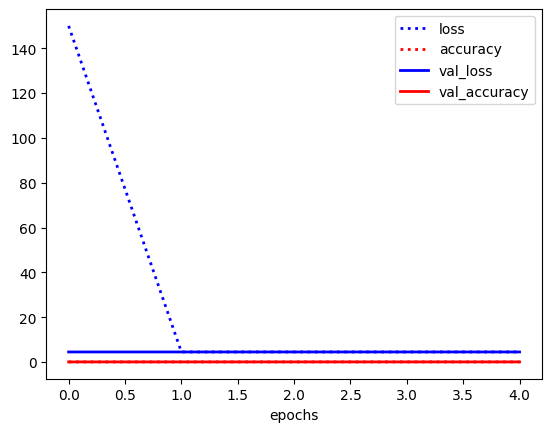

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 10)                491530    
                                                                 
 dense_1 (Dense)             (None, 86)                946       
                                                                 
Total params: 492,476
Trainable params: 492,476
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# Toy usage example
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((IMG_SIZE*IMG_SIZE*3,), input_shape=(IMG_SIZE,IMG_SIZE,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, base_dir,
               train=True, train_generator=train_generator, valid_generator=valid_generator, epochs=5,
               batch_size=None, steps_per_epoch=train_generator.n//train_generator.batch_size, 
               validation_steps = valid_generator.n//valid_generator.batch_size)

Max val score: 1.25%


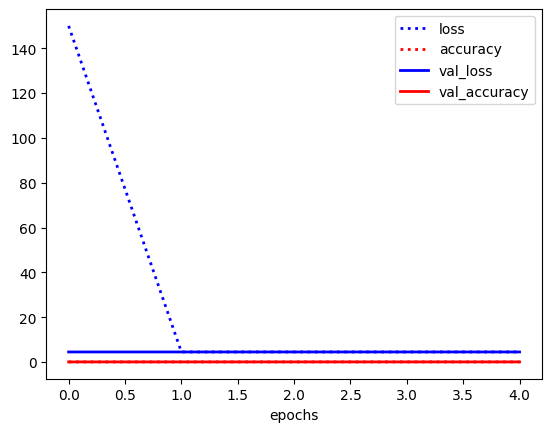

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 10)                491530    
                                                                 
 dense_1 (Dense)             (None, 86)                946       
                                                                 
Total params: 492,476
Trainable params: 492,476
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# Toy usage example
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, base_dir, train=False)

## Part 1. Design a convolutional neural network (20 points)
- Build a sequential convolutional neural network to distinguish the 86 types of plankton
- Try to achieve the best validation accuracy you can. You should be able to get at least 10% validation accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. You can use different batch sizes and number of epochs, but keep the number of epochs smaller than 100.
- You should train the model from scratch. Hence, you should NOT use any pretrained models (we'll do that in the next part).
- Augment the preprocessed training data (e.g. by implementing a new version of the ImageDataGenerator defined above). You can explore using image shifts, rotations, zooming, flips, color augmentation, etc. What works well, and what does not? Reason about what might work or not on these images.
- Implement a function `build_model_1` that returns the (untrained) model. Evaluate the model with the augmented data using the 'run_evaluation' function.
- Store the trained model as 'model_1'. Copy the observed validation accuracy in 'valid_accuracy_1'.
- Explore all relevant design decisions (batch size, number of convolution and dense layers, selection of activation functions, filter sizes, strides, padding techniques, regularization,...). 
- Add a description of your design choices in 'answer_1': explain what you did, why, and what the effect is on performance. You are allowed **600** characters for this answer (but don’t ramble).
- Your submitted notebook should contain:
  - your model implementation in `build_model_1`
  - the result (plot) of running `run_evaluation`
  - the reported performance copied into `valid_accuracy_1`
  - your explanation in `answer_1`

**NOTE:** Consider how this data is different from the examples we saw in class. The resolution is higher, so you may need more and larger filters, more layers, etc.

In [12]:
#write a function to take in a list of image and plot them in a grid
def plot_images_grid(images, y_vals):
    img_len=len(images)
    fig,axes=plt.subplots(int(img_len/5),5,figsize=(15,45),layout='constrained')
    for i,ax in enumerate(axes.flat):
        ax.imshow(images[i],cmap='gray')
        xlabel=(y_vals[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()
    

In [13]:
#funtion to take in a dataframe and y_column,
#find all unique y labels and return 1 image for each class
def get_random_images(df,y_column):
    images=[]
    for y in df[y_column].unique():
        images.append(df[df[y_column]==y].sample(1))
    return images
image_list=get_random_images(df_train,'encoded_labels')

In [14]:
#function to take in a list of image location and return image values
def get_images(image_list):
    images=[]
    labels=[]
    for image in image_list:
        file_name=image.FILE_NAME.values[0]
        images.append(cv2.imread(os.path.join(data_dir,file_name),0))
        labels.append(image.encoded_labels.values[0])
    return images,labels

In [15]:
#helper function that will combine the above two functions
def get_images_from_df(df,y_column,image_list=None,transform=False):
    if image_list is None:
        image_list=get_random_images(df,y_column)
    img_values,labels=get_images(image_list)
    #apply gaussian filter to the image
    if transform:
        for i in range(len(img_values)):
            #img_values[i] = ndimage.gaussian_filter(img_values[i], sigma=1)
            #img_values[i] = ndimage.sobel(img_values[i], axis=-1)
            img_values[i]=cv2.Canny(img_values[i],40,200,apertureSize = 3)
    plot_images_grid(img_values,labels)

In [88]:
image_list=get_random_images(df_train,'encoded_labels')

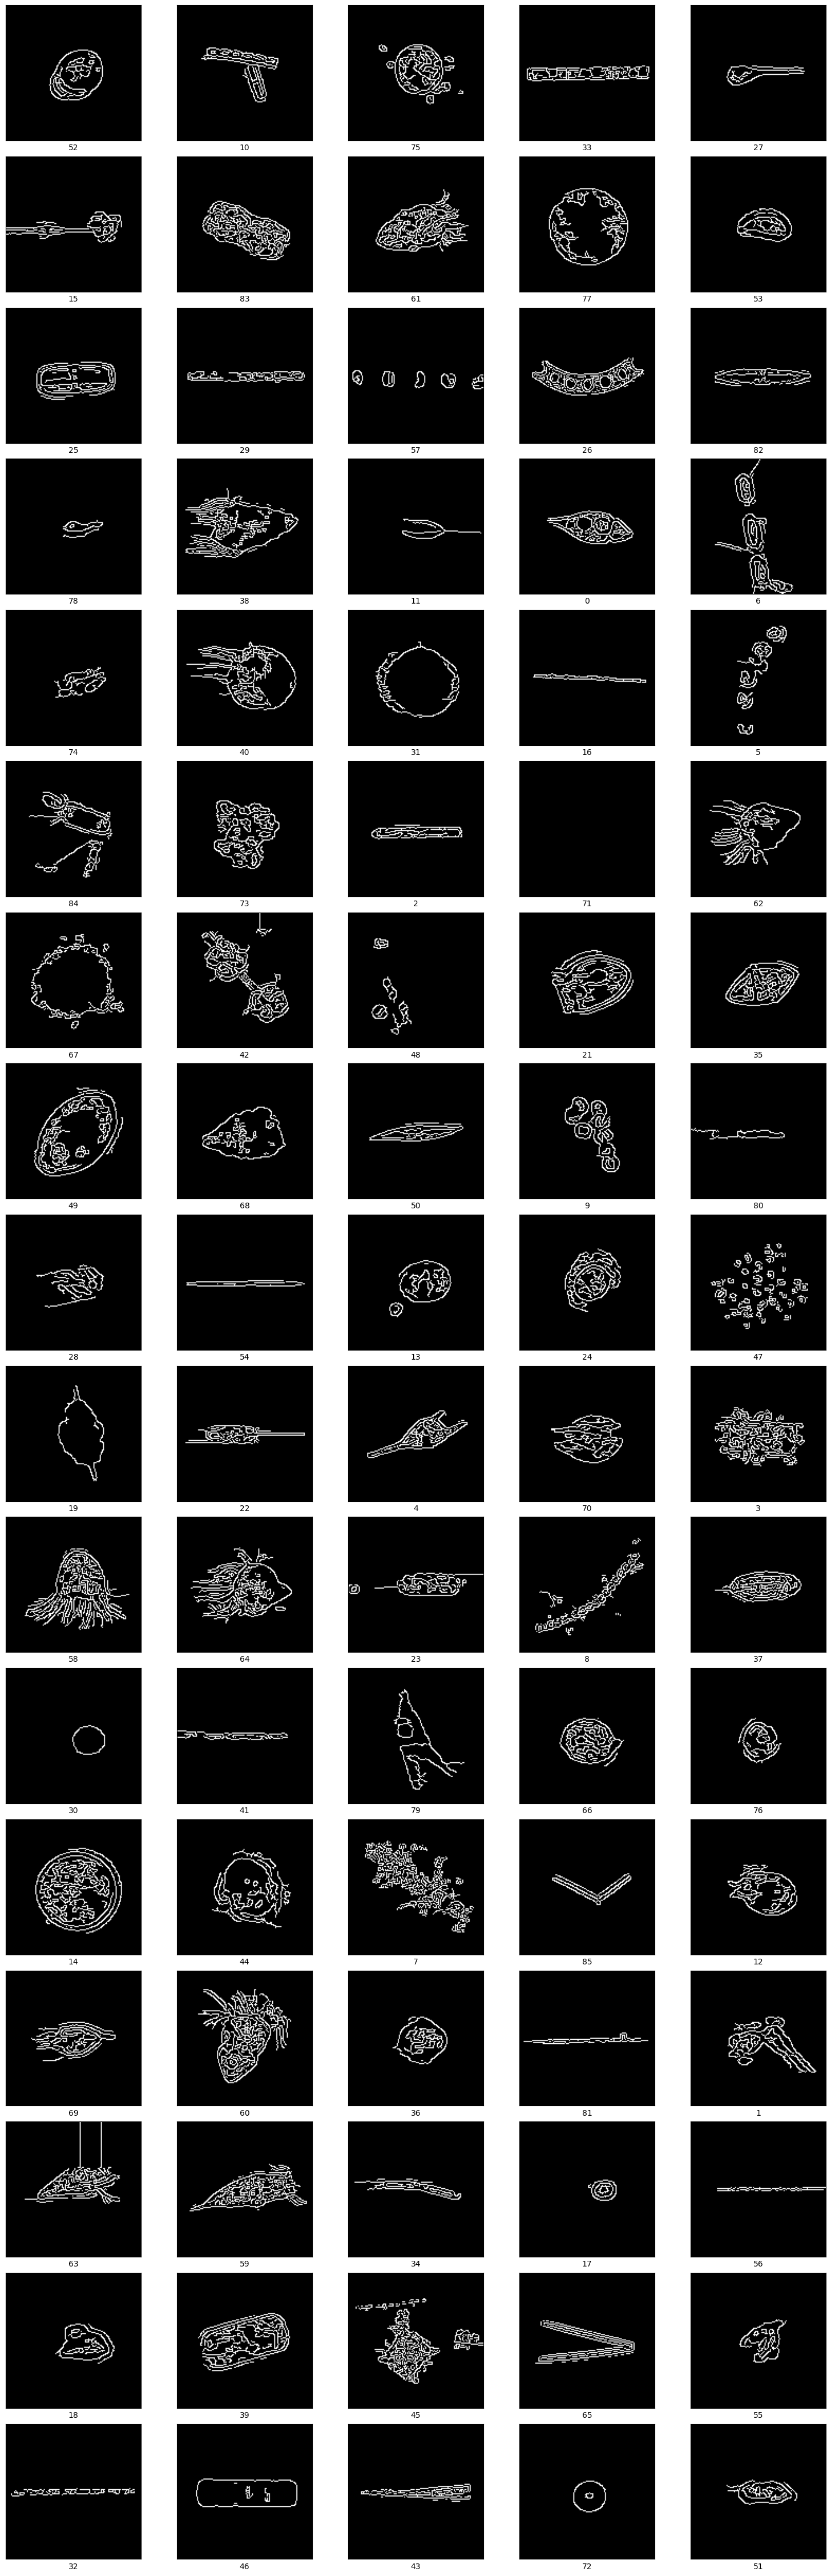

In [137]:
get_images_from_df(df_train,'encoded_labels',image_list,True)

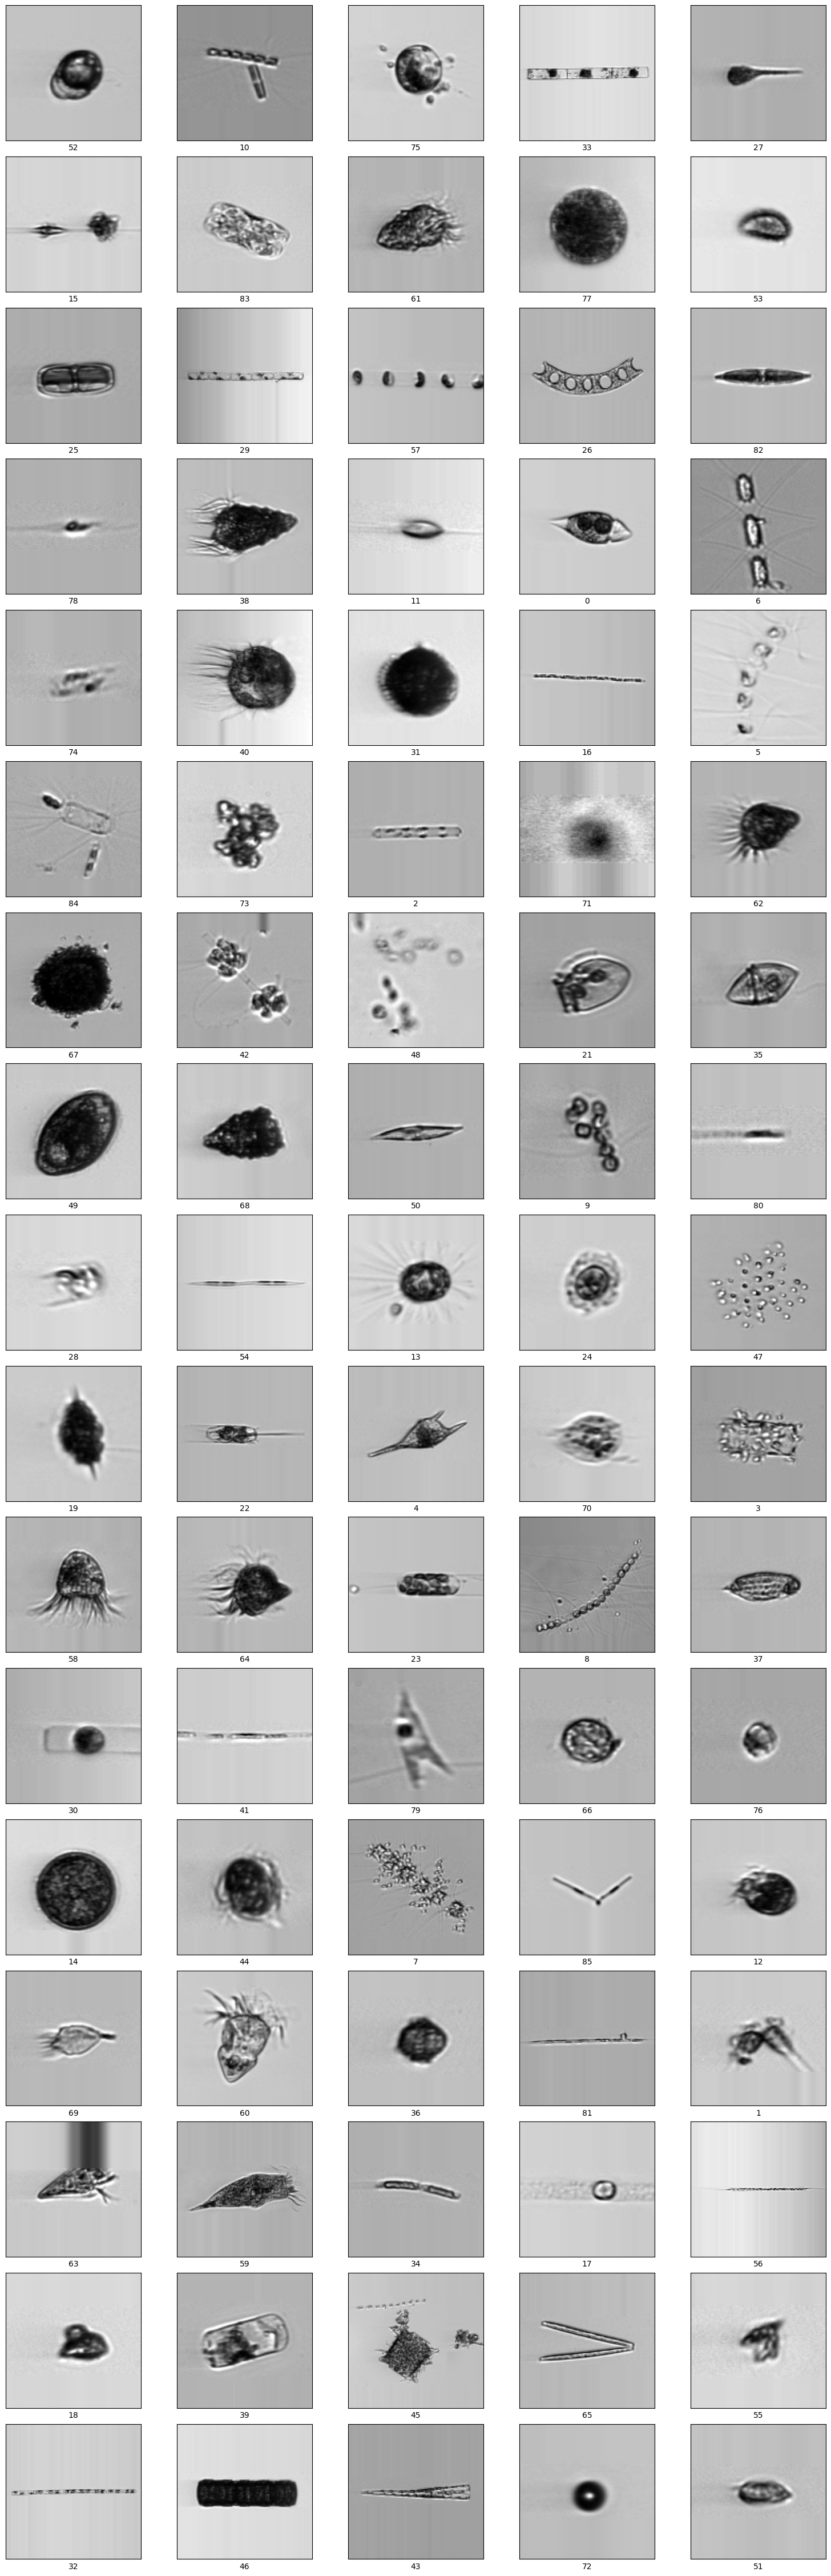

In [138]:
get_images_from_df(df_train,'encoded_labels',image_list)

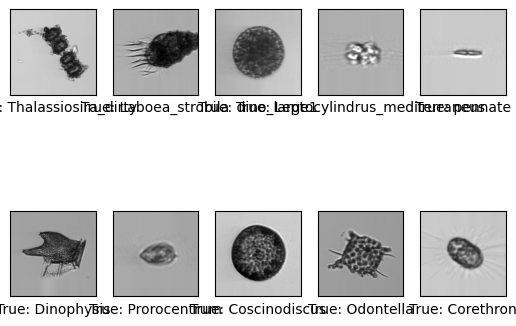

In [44]:
plot_images_grid(X_rand_train[0:10],y_rand_train[0:10])

In [24]:
#Preprocessing function to apply canny edge detection to the image
import cv2
def canny_edge_detection(image):
    image=image.astype('uint8')
    image=cv2.Canny(image,40,200,apertureSize = 3)
    return image

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   brightness_range=[0.2,1.0])



train_generator = datagen_train.flow_from_dataframe(dataframe=df_train, 
                                            directory=data_dir,
                                            #color_mode='grayscale',
                                            x_col="FILE_NAME", y_col="encoded_labels",
                                            class_mode="categorical",
                                            target_size=(128,128),
                                            batch_size=32,
                                            validate_filenames=False)

datagen_valid = ImageDataGenerator()

valid_generator = datagen_valid.flow_from_dataframe(dataframe=df_valid, 
                                            directory=data_dir,
                                            #color_mode='grayscale',
                                            x_col="FILE_NAME", y_col="encoded_labels",
                                            class_mode="categorical",
                                            target_size=(128,128),
                                            batch_size=32,
                                            validate_filenames=False)

Found 3096 non-validated image filenames belonging to 86 classes.
Found 344 non-validated image filenames belonging to 86 classes.


In [55]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2),
        layers.RandomContrast(0.2),
        layers.RandomTranslation(0.2, 0.2),
        layers.RandomHeight(0.2),
        layers.RandomWidth(0.2)
        
    ]
)

In [56]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [23]:
import tensorflow as tf
import cv2

class Blahedgedetection(tf.keras.layers.Layer):
    def __init__(self, threshold1, threshold2, **kwargs):
        super(Blahedgedetection, self).__init__(**kwargs)
        self.threshold1 = threshold1
        self.threshold2 = threshold2

    def call(self, inputs):
        # Convert input images to grayscale
        grayscale_images = inputs

        # Apply Canny edge detection to each image in the batch
        edge_maps = []
        for i in range(inputs.shape[0]):
           
            edge_map = cv2.Canny(grayscale_images[i].numpy().astype('uint8'), 
                                 self.threshold1,
                                 self.threshold2)
            edge_maps.append(edge_map)
       
        # Stack the edge maps into a batch
        edge_maps_batch = tf.stack(edge_maps, axis=0)

        # Reshape the edge maps to match the input shape
        output_shape = (inputs.shape[0], inputs.shape[1], inputs.shape[2], 1)
        edge_maps_batch = tf.reshape(edge_maps_batch, output_shape)

        return edge_maps_batch

    def get_config(self):
        config = super(Blahedgedetection, self).get_config()
        config.update({'threshold1': self.threshold1, 'threshold2': self.threshold2})
        return config


Training the model
Epoch 1/50


d:\DSAI-22-24\TUe-Year1\Q3\MLE\assignment-3-PhobosX15\.conda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


96/96 [==============================] - 45s 465ms/step - loss: 4.2272 - accuracy: 0.0467 - val_loss: 4.6460 - val_accuracy: 0.0125
Epoch 2/50
96/96 [==============================] - 44s 458ms/step - loss: 3.9011 - accuracy: 0.0855 - val_loss: 4.9897 - val_accuracy: 0.0156
Epoch 3/50
96/96 [==============================] - 44s 458ms/step - loss: 3.7674 - accuracy: 0.1162 - val_loss: 6.3584 - val_accuracy: 0.0094
Epoch 4/50
96/96 [==============================] - 44s 460ms/step - loss: 3.6168 - accuracy: 0.1426 - val_loss: 7.4810 - val_accuracy: 0.0094
Epoch 5/50
96/96 [==============================] - 44s 458ms/step - loss: 3.5629 - accuracy: 0.1472 - val_loss: 8.3405 - val_accuracy: 0.0156
Epoch 6/50
96/96 [==============================] - 44s 456ms/step - loss: 3.4630 - accuracy: 0.1789 - val_loss: 7.0377 - val_accuracy: 0.0188
Epoch 7/50
96/96 [==============================] - 44s 457ms/step - loss: 3.4108 - accuracy: 0.1952 - val_loss: 5.9942 - val_accuracy: 0.0531
Epoch 8/50

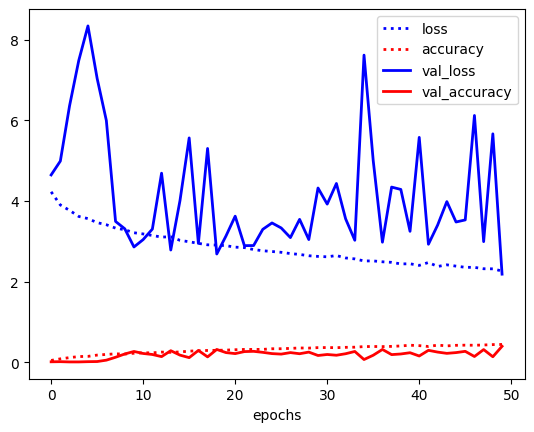

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 blahedgedetection_10 (Blahe  multiple                 0         
 dgedetection)                                                   
                                                                 
 rescaling_10 (Rescaling)    multiple                  0         
                                                                 
 conv2d_42 (Conv2D)          multiple                  640       
                                                                 
 batch_normalization_34 (Bat  multiple                 256       
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          multiple                  73856     
                                                                 
 batch_normalization_35 (Bat  multiple               

In [71]:
from keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model_1():
    #build a CNN model with 3 convolutional layers and 2 dense layers starting with 128 filters
    #use a kernel size of 3x3 and a stride of 1x1
    model = models.Sequential()
    #model.add(data_augmentation)
    model.add(Blahedgedetection(40,200))
    model.add(layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE,1)))   
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(512, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(1024, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())    
    
    #model.add(layers.Dense(86, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Flatten())
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model


run_evaluation("model_1", build_model_1, base_dir,
               train=True, train_generator=train_generator, valid_generator=valid_generator, epochs=50,
               batch_size=None, steps_per_epoch=train_generator.n//train_generator.batch_size, 
               validation_steps = valid_generator.n//valid_generator.batch_size)





In [61]:
valid_accuracy_1 = 39.69
print(valid_accuracy_1)
answer_1 ="""The following preprocessing was done: I converted the image into grayscale.
 I used data augmentation to increase the number of images through rotation, flipping and shearing.
Canny filter was applied since I believed that the edges were the most important features in the images.
These various preprocessing steps were combined by using ImageDataGenerator and a Custom Layer that computes the Canny filter. 
These model contains 3 convolutional layers and 1 dense layer starting with 128 filters. 
The model was trained for 50 epochs with a batch size of 32."""
print("Answer is {} characters long".format(len(answer_1)))

39.69
Answer is 559 characters long


## Part 2. Transfer learning (20 points)
- Import a pretrained model. You can choose any model you like, but be careful that it is not too large. We recommend the MobileNet models (V1, V2 and V3) pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_2` that adds at least one dense hidden layer and output layer to the convolutional base, and freezes the convolutional base. Add [Global Average Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D) after the convolutional base, right before the dense layer(s). Consider unfreezing the last few convolutional layers, in a systematic way, and evaluate whether that works better. You can also consider adding multiple dense hidden layers and regularization layers.
- As before, define new training and validation generators and explore the multiple data augmentations available in [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). Train the resulting model on the augmented training data for the 86-class problem.
- Evaluate model_2 using `run_evaluation`. Store the best validation accuracy on the validation set in `valid_accuracy_2`. You should be able to obtain a validation accuracy of at least 70%.
- Add a description of your design choices in 'answer_2': explain what you did, why, and what the effect is on performance. You are allowed **600** characters for this answer (but don’t ramble).
- Your submitted notebook should contain:
  - your model implementation in `build_model_2`
  - the result (plot) of running `run_evaluation`
  - the reported performance copied into `valid_accuracy_2`
  - your explanation in `answer_2`

Training the model
Epoch 1/10


d:\DSAI-22-24\TUe-Year1\Q3\MLE\assignment-3-PhobosX15\.conda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


96/96 [==============================] - 30s 315ms/step - loss: 4.3866 - accuracy: 0.7389 - val_loss: 4.5645 - val_accuracy: 0.7063
Epoch 2/10
96/96 [==============================] - 31s 319ms/step - loss: 4.3905 - accuracy: 0.7373 - val_loss: 4.5114 - val_accuracy: 0.7125
Epoch 3/10
96/96 [==============================] - 30s 306ms/step - loss: 4.3550 - accuracy: 0.7392 - val_loss: 4.5337 - val_accuracy: 0.7219
Epoch 4/10
96/96 [==============================] - 29s 303ms/step - loss: 4.3177 - accuracy: 0.7458 - val_loss: 4.5241 - val_accuracy: 0.7125
Epoch 5/10
96/96 [==============================] - 30s 312ms/step - loss: 4.3043 - accuracy: 0.7546 - val_loss: 4.4871 - val_accuracy: 0.7219
Epoch 6/10
96/96 [==============================] - 29s 305ms/step - loss: 4.2925 - accuracy: 0.7445 - val_loss: 4.4521 - val_accuracy: 0.7156
Epoch 7/10
96/96 [==============================] - 29s 303ms/step - loss: 4.2972 - accuracy: 0.7484 - val_loss: 4.4673 - val_accuracy: 0.7156
Epoch 8/10

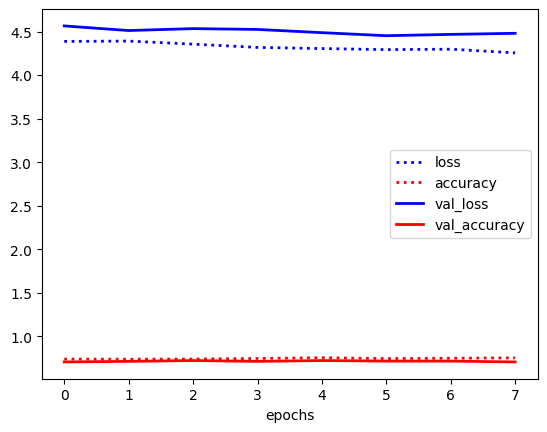

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 4, 4, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d_4   (None, 960)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_6 (Batc  (None, 960)              3840      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 960)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               492032    
                                                      

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras import regularizers

def build_model_2():
    #load model from file
    base_model= MobileNetV3Large(weights='imagenet',
                                 pooling=None,
                                 include_top=False,
                                 include_preprocessing=True,
                                 input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                )
    base_model.trainable = False

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    run_evaluation("Mobile_large_ft_final", build_model_2, base_dir,
               train=True, train_generator=train_generator, valid_generator=valid_generator, epochs=10,
               batch_size=None, steps_per_epoch=train_generator.n//train_generator.batch_size, 
               validation_steps = valid_generator.n//valid_generator.batch_size)
    
    model=load_model('models//Mobile_large_ft_final.h5')

    model.trainable = True
    for layers in model.layers[0].layers[:-3]:
        layers.trainable = False

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    return model

    

run_evaluation("Mobile_large_ft_final", build_model_2, base_dir,
               train=True, train_generator=train_generator, valid_generator=valid_generator, epochs=10,
               batch_size=None, steps_per_epoch=train_generator.n//train_generator.batch_size, 
               validation_steps = valid_generator.n//valid_generator.batch_size)



In [98]:
valid_accuracy_2 = 72.19
print(valid_accuracy_2)

answer_2 = """
           We used the MobileNetV3Large model for its ability to learn complex and spatially diverse fatures. The model was modified by adding a GAP and a few dense layers to it. To prevent over-fitting and vanishing gradient, Dropout, Normalization and 'Leaky Relu' activate were implemented along with regulizers. Through feature extraction we managed 68.12% val_acc and then fine-tuned by unfreezing the last 3 layers for 10 epochs and got a validation accuracy of 72.19%.
           """
print("Answer is {} characters long".format(len(answer_2)))

72.19
Answer is 488 characters long


## Part 3 Model interpretation (10 points)
### Visualizing activations (5 points)

* Select your favorite plankton specimen (a single sample) from the test set.
* Retrieve and visualize the activations (feature maps) of `model_2` for that sample, for every filter for every other convolutional layer (i.e. 1, 3, 5,...). If that doesn't make sense for your model, select a few convolutional models at different depths in a way that does make sense.
* Implement a function `plot_activations()` that plots these activations. Check the code in the notebook of the CNN lecture to see how this is usually done.
* Give an explanation (as detailed as you can) about your observations in `answer_3`. Is your model indeed learning something useful?
- You are allowed **300** characters for this answer (but don’t ramble).

Note: When selecting the convolutional layers, make sure to include the convolutional base layers of the pretrained model that you imported.

1/1 [==============================] - 0s 39ms/step


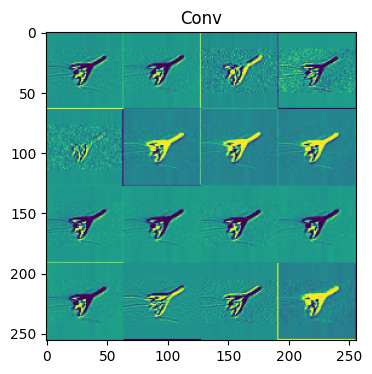

1/1 [==============================] - 0s 42ms/step


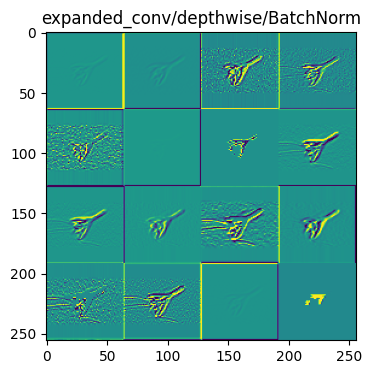

1/1 [==============================] - 0s 44ms/step


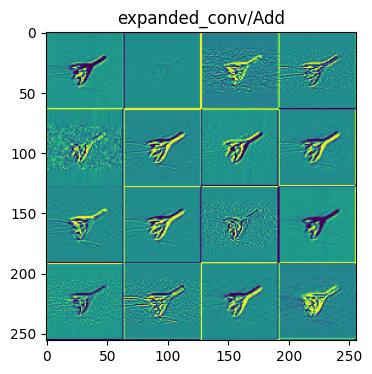

1/1 [==============================] - 0s 43ms/step


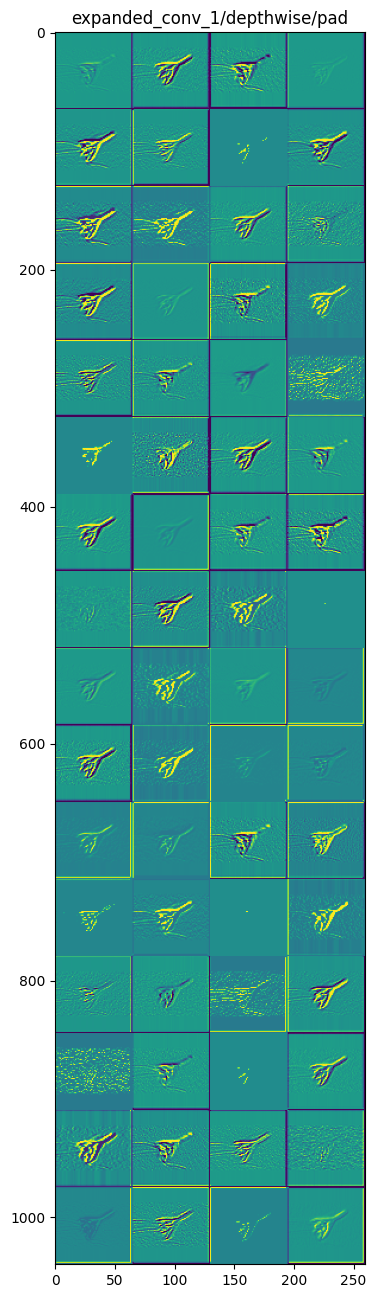

1/1 [==============================] - 0s 54ms/step


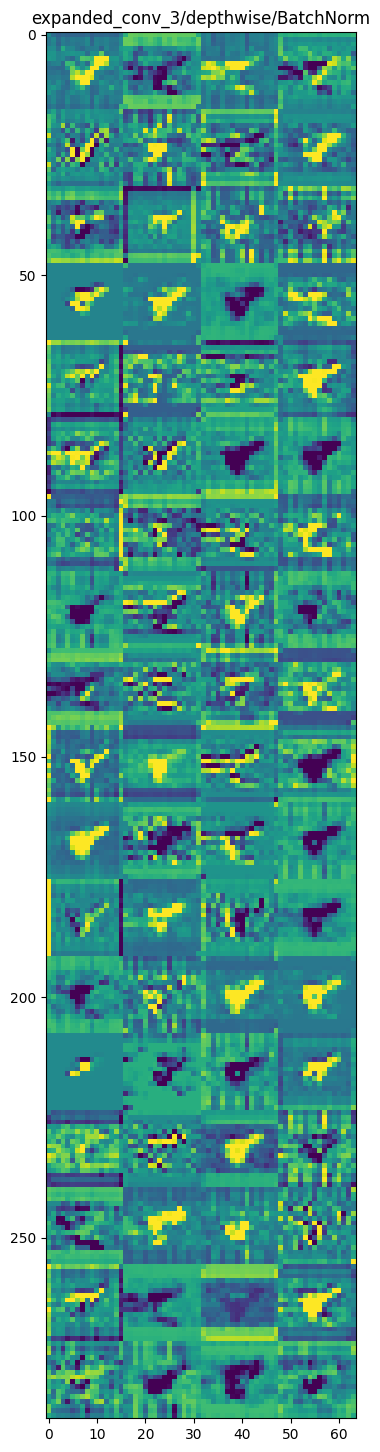

1/1 [==============================] - 0s 77ms/step


C:\Users\pavan\AppData\Local\Temp\ipykernel_5808\2379645437.py:44: RuntimeWarning: divide by zero encountered in divide
  channel_image /= channel_image.std()


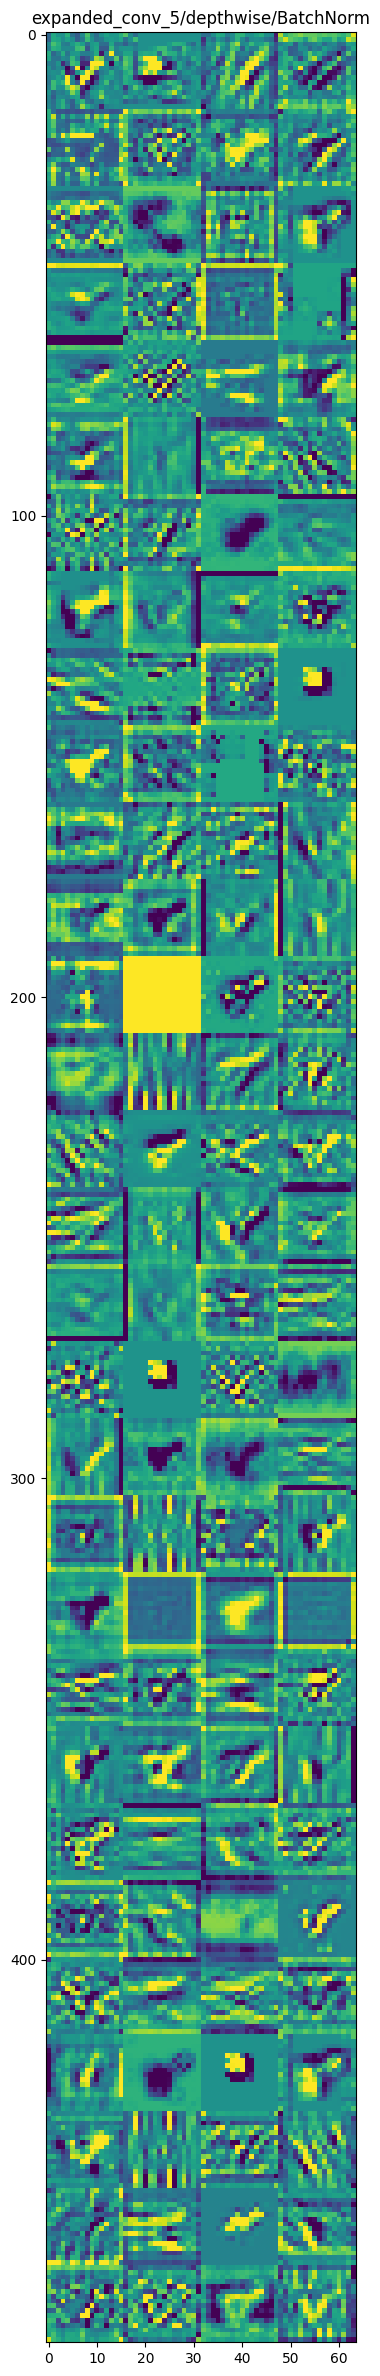

1/1 [==============================] - 0s 100ms/step


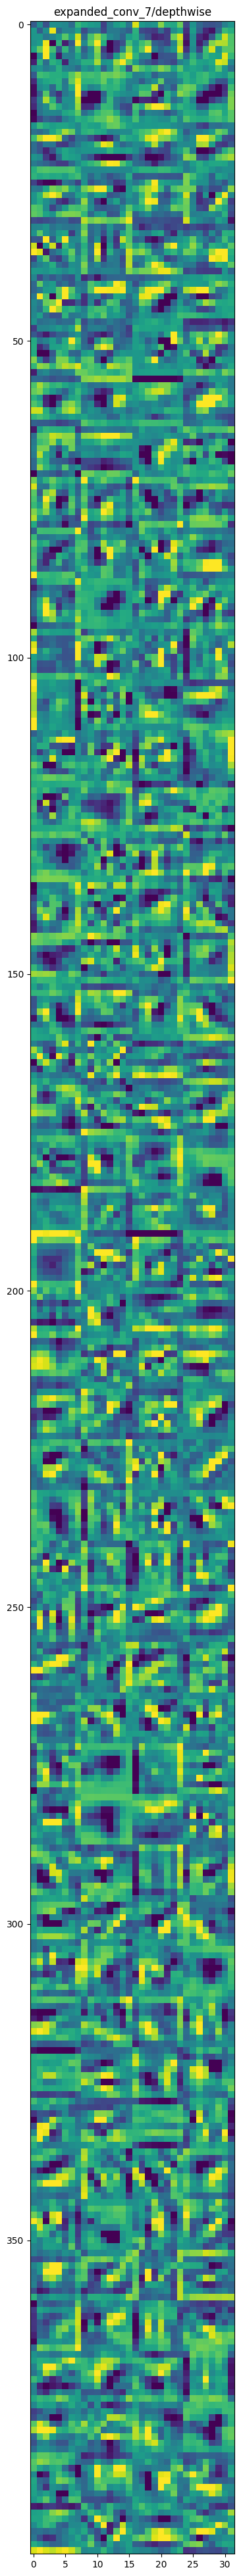

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras import regularizers
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

def plot_activations():
    model = load_model('models//Mobile_large_ft_final.h5')
    
    #image per row
    image_per_row = 4

    sample_label = df_train.encoded_labels.sample(1).values[0]
    sample_image = df_train[df_train.encoded_labels == sample_label].sample(1).FILE_NAME.values[0]
    sample_image = cv2.imread(os.path.join(data_dir,sample_image))
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    sample_image = np.expand_dims(sample_image, axis=0)
    sample_image = preprocess_input(sample_image)

    #Extract the outputs of every other layer
    layer_indices = [2,9,13,17,37,70,104]
    layer_outputs = [model.layers[0].layers[i].output for i in layer_indices]

    layer_names = [model.layers[0].layers[i].name for i in layer_indices]
    #plot the activations
    for name, activation in zip(layer_names, layer_outputs):
        intermediate_layer_model = models.Model(inputs=model.layers[0].input, outputs=activation, name=name)
        layer_activation = intermediate_layer_model.predict(sample_image)
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // image_per_row
        display_grid = np.zeros((size * n_cols, image_per_row * size))

        for col in range(n_cols):
            for row in range(image_per_row):
                channel_image = layer_activation[0,
                                                 :,
                                                 :,
                                                 col * image_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                                row * size : (row + 1) * size] = channel_image
                
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()
        

plot_activations() 



In [93]:
answer_3 = """We have displayed the base, 1st,3rd,5th and 7th layers used in MobileNetV3 model. Until the 3rd layer, the features are very general, and it seems that the mode is learning the right features. However, from the 5th layer, the features are getting more complex and is tough to infer.  
           """
print("Answer is {} characters long".format(len(answer_3)))

Answer is 296 characters long


### Visualizing the learned embeddings with tSNE (5 points)

Extract the learned embeddings of the images from df_train using your `model_2` and plot them on a 2D map using [tSNE](https://lvdmaaten.github.io/tsne/) as the dimensionality reduction technique.

- Implement a function `create_embeddings` to extract the n-sized embeddings based on the  Convolutional part of `model_2` (e.g MobileNetV2 generates 1280-sized embeddings). The embeddings are the output of the GlobalAveragePooling layer. 
- Implement a function `compute_tsne` that applies scikit-learn's implementation of [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the size of the embeddings from n to 2 (e.g for MobileNetV2 this will mean `original_array` of  size (num_images, 1280) compressed to a reduced array of size (num_images, 2))
- Implement a function `plot_tsne` that plots the 2D vector on a map, color-coded by the true labels. Make sure that we can clearly interpret which class corresponds to which color (e.g. add a legend or annotation with colors).

**Implementation note**: You need to define a new generator, tsne_generator, similar to the train_generator provided at the beginning of the assignment. You will provide the generator with batch size 1 to the predict function of `model_2`. 


In [21]:
from sklearn.manifold import TSNE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet, MobileNetV2, MobileNetV3Small, MobileNetV3Large
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras import regularizers
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

tsne_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_dataframe(
    df_train,
    directory=data_dir,
    x_col='FILE_NAME',
    y_col='encoded_labels',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    validate_filenames=False,
)

def create_embeddings(model_file):
    model = load_model(model_file)
    #use the tsne_generator to extract embeddings from the model
    #return the embeddings
    embeddings=[]
    intermediate_layer_model = models.Model(inputs=model.input, outputs=model.layers[1].output)
    for i in range(tsne_generator.n//tsne_generator.batch_size):
        embeddings.append(intermediate_layer_model.predict(tsne_generator[i][0],verbose=0))
    embeddings = np.concatenate(embeddings)
    
    return embeddings

def compute_tsne(original_array):
    
    embed_tsne=TSNE(n_components=2, perplexity=30, verbose=1, n_iter=1000, random_state=42).fit_transform(original_array)

    return embed_tsne

# n-sized embeddings extracted from X_train and reduced to 2-sized embeddings
dn_embs = create_embeddings("Mobile_large_ft_final.h5")
d2_embs = compute_tsne(dn_embs)


Found 3096 non-validated image filenames belonging to 86 classes.


d:\DSAI-22-24\TUe-Year1\Q3\MLE\assignment-3-PhobosX15\.conda\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3096 samples in 0.002s...
[t-SNE] Computed neighbors for 3096 samples in 1.407s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3096
[t-SNE] Computed conditional probabilities for sample 2000 / 3096
[t-SNE] Computed conditional probabilities for sample 3000 / 3096
[t-SNE] Computed conditional probabilities for sample 3096 / 3096
[t-SNE] Mean sigma: 7.007539
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.656601
[t-SNE] KL divergence after 1000 iterations: 1.440979


<Figure size 1000x1000 with 0 Axes>

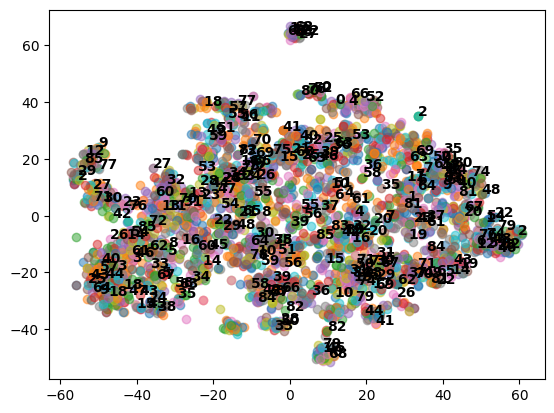

In [30]:
def plot_tsne(tsne_embeds, labels):
    plt.figure(figsize=(10, 10))
    #scatter plot of the 2-dimensional embeddings with  clear color distinction
    # define a list of markers to use for each class
    #markers = ['o', 's', '^', 'v', 'd', 'p', 'h', 'x', '+', '*', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', 'H', 'X', 'D', 'd', '|', '_', 'o', 's', '^', 'v', 'd', 'p', 'h', 'x', '+', '*', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', 'H', 'X', 'D', 'd', '|', '_', 'o', 's', '^', 'v', 'd', 'p', 'h', 'x', '+', '*', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', 'H', 'X', 'D', 'd', '|', '_','']
    m=3
    fig, ax = plt.subplots()
    #combine tsne embeddings with labels as a dataframe
    df = pd.DataFrame(tsne_embeds, columns=['x', 'y'])
    df['labels'] = labels

    for label in np.unique(labels):
        plt.scatter(df[df['labels'] == label]['x'], df[df['labels'] == label]['y'], label=label, alpha=0.5)
        tmp=df.loc[df['labels']==label].sample(m)

        for _, row in tmp.iterrows():
            plt.annotate(label, 
                         (row['x'], row['y']), 
                         size=10,
                          weight='bold',
                          color='k',
                          )
        



    """ scatter= ax.scatter(tsne_embeds[:, 0], tsne_embeds[:, 1], c=labels,cmap='jet')
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
    ax.add_artist(legend1)
    #plt.colorbar(scatter)
    plt.show() """

# Example call, including class names
labels = df_train['encoded_labels'].astype('int').to_numpy()
class_names = dict(zip(df_train['encoded_labels'].astype('int'), df_train['CATEGORY']))
plot_tsne(d2_embs, labels)